# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

## Important Note

This notebook is AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. The primary purpose is to demonstrate how to access and work with the data in this Dandiset.

## Overview

This notebook explores Dandiset 001366, which contains imaging data focused on comparing different approaches for measuring surface vessel diameter and pulsatility in mice. The dataset includes movies of pial vessels recorded through thinned skull windows.

**Dandiset Link**: [https://dandiarchive.org/dandiset/001366/0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603)

In this notebook, we will:
1. Load the Dandiset and examine its metadata
2. Explore the structure of the NWB files
3. Visualize example frames from the vessel imaging data
4. Analyze basic characteristics of vessel diameter and pulsatility
5. Demonstrate different methods for quantifying vessel properties

## Required Packages

The following packages are needed to run this notebook:

- `numpy`: For numerical operations
- `matplotlib`: For plotting and visualization
- `pynwb`: For working with Neurodata Without Borders (NWB) files
- `h5py`: For working with HDF5 files (the format underlying NWB)
- `remfile`: For streaming remote files
- `dandi`: For accessing the DANDI archive
- `scipy`: For signal processing and image analysis

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient
from itertools import islice
import scipy.ndimage as ndimage
from scipy import signal
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Set up plotting
sns.set_theme()

## Loading the Dandiset

First, let's connect to the DANDI archive and load information about our Dandiset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
print(f"Keywords: {', '.join(metadata.get('keywords', []))}")

# List assets in the Dandiset
assets = dandiset.get_assets()
print("\nAssets in the Dandiset:")
for asset in assets:
    print(f"- {asset.path} (Size: {asset.size / 1e6:.2f} MB)")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603
Description: movies of a pial vessel of mice used in the experiments.
Keywords: full width at half maximum, vessel pulsation, image analysis, vessel diameter, radon transform

Assets in the Dandiset:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (Size: 408.09 MB)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (Size: 2377.82 MB)


## Exploring an NWB File

Now, let's load one of the NWB files to examine its contents. We'll work with the file `sub-F15/sub-F15_ses-F15BC-19102023_image.nwb` from the Dandiset.

In [3]:
# Get the asset we want to examine
asset_path = "sub-F15/sub-F15_ses-F15BC-19102023_image.nwb"
asset = None
for a in dandiset.get_assets():
    if a.path == asset_path:
        asset = a
        break

if asset:
    print(f"Found asset: {asset.path}")
    print(f"Asset size: {asset.size / 1e6:.2f} MB")
    print(f"Asset ID: {asset.identifier}")
    print(f"Download URL: {asset.get_download_url()}")
else:
    print(f"Asset {asset_path} not found")

Found asset: sub-F15/sub-F15_ses-F15BC-19102023_image.nwb
Asset size: 408.09 MB
Asset ID: 71fa07fc-4309-4013-8edd-13213a86a67d


AttributeError: 'RemoteBlobAsset' object has no attribute 'get_download_url'

In [4]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Contents Summary

Let's explore the structure and contents of the NWB file:

In [5]:
# Basic metadata
print("## Basic NWB File Metadata ##")
print(f"File identifier: {nwb.identifier}")
print(f"Session ID: {nwb.session_id}")
print(f"Institution: {nwb.institution}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Experimenter: {', '.join(nwb.experimenter)}")
print(f"Keywords: {nwb.keywords[:]}")

# Subject information
print("\n## Subject Information ##")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Strain: {nwb.subject.strain}")
print(f"Age: {nwb.subject.age} (reference: {nwb.subject.age__reference})")
print(f"Sex: {nwb.subject.sex}")
print(f"Description: {nwb.subject.description}")

## Basic NWB File Metadata ##
File identifier: 202309_Hashmat-OCT.2023-F15BC-19102023
Session ID: F15BC-19102023
Institution: University of Copenhagen
Session description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Session start time: 2023-10-19 02:00:00-04:00
Experiment description: Vessel diameter and pulsatility measurement.
Experimenter: Ghanizada, Hashmat 
Keywords: ['Vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis']

## Subject Information ##
Subject ID: F15
Species: Mus musculus
Strain: C57BL/6J
Age: P9W/P16W (reference: birth)
Sex: F
Description: wild-type mouse


### Exploring the Image Data

This NWB file contains a movie of a pial vessel. Let's examine the properties of this image series:

In [6]:
# Access the Movies data
movies = nwb.acquisition["Movies"]

print("## Movies ImageSeries Information ##")
print(f"Description: {movies.description}")
print(f"Comments: {movies.comments}")
print(f"Data shape: {movies.data.shape} (frames, height, width)")
print(f"Data type: {movies.data.dtype}")
print(f"Frame rate: {movies.rate} Hz")
print(f"Starting time: {movies.starting_time} {movies.starting_time_unit}")
print(f"Unit: {movies.unit}")

# Calculate recording duration
duration = movies.data.shape[0] / movies.rate
print(f"Recording duration: {duration:.2f} seconds ({duration/60:.2f} minutes)")

## Movies ImageSeries Information ##
Description: 16-bit grayscale movie of a pial vessel
Comments: no comments
Data shape: (9553, 214, 132) (frames, height, width)
Data type: uint16
Frame rate: 54.47 Hz
Starting time: 0.0 seconds
Unit: n.a.
Recording duration: 175.38 seconds (2.92 minutes)


You can explore this NWB file directly in the Neurosift web app at this URL:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/&dandisetId=001366&dandisetVersion=0.250324.1603](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/&dandisetId=001366&dandisetVersion=0.250324.1603)

## Visualizing the Vessel Imaging Data

Let's visualize some frames from the vessel movie to get a sense of the data:

Loaded sample frames shape: (10, 214, 132)


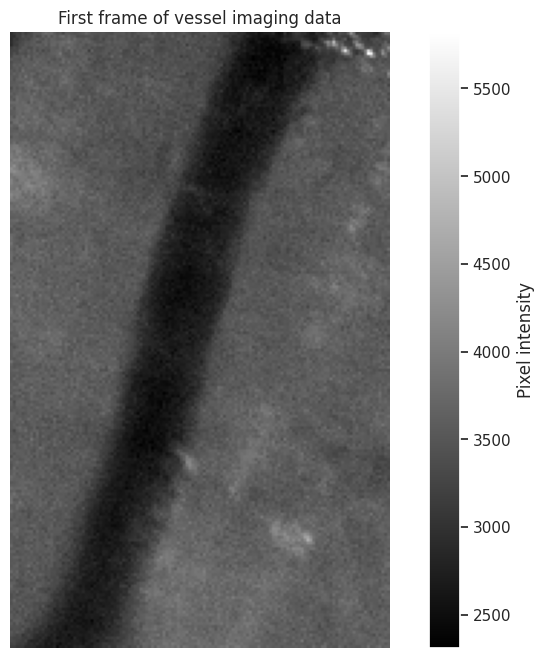

In [7]:
# Load a subset of frames (first 10 frames)
sample_frames = movies.data[0:10, :, :]
print(f"Loaded sample frames shape: {sample_frames.shape}")

# Display the first frame
plt.figure(figsize=(10, 8))
plt.imshow(sample_frames[0], cmap='gray')
plt.colorbar(label='Pixel intensity')
plt.title('First frame of vessel imaging data')
plt.axis('off')
plt.show()

Let's visualize a few consecutive frames to see the vessel structure:

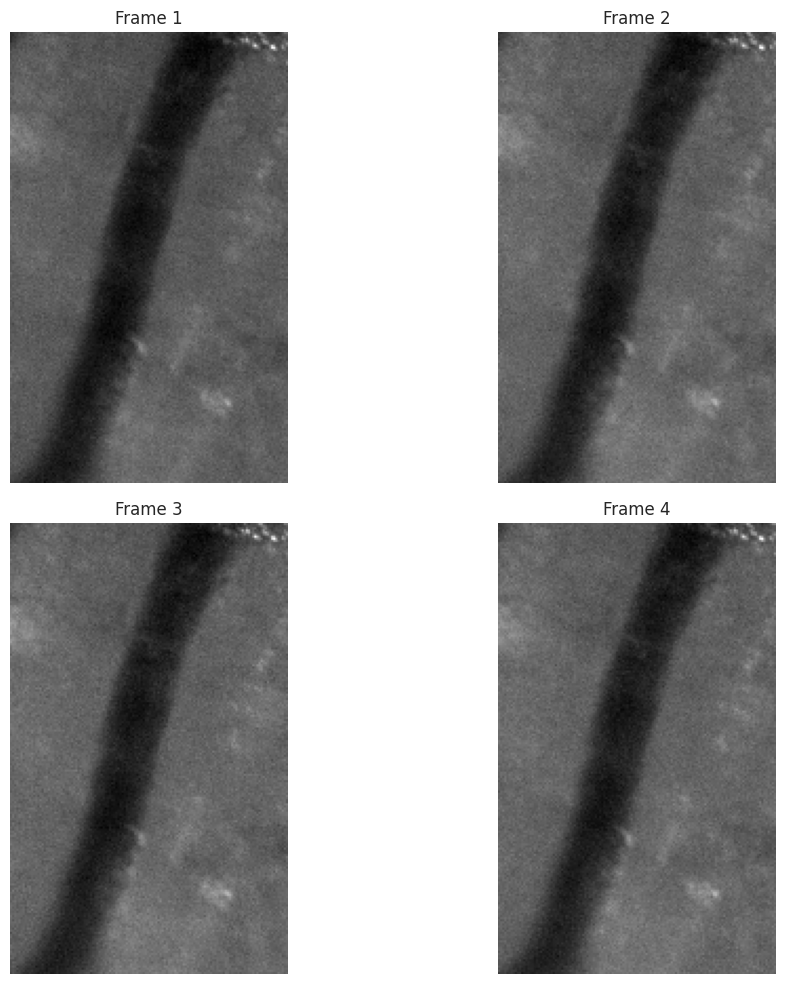

In [8]:
# Plot the first 4 frames
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i in range(4):
    axes[i].imshow(sample_frames[i], cmap='gray')
    axes[i].set_title(f'Frame {i+1}')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

Let's create an enhanced visualization to better see the blood vessel:

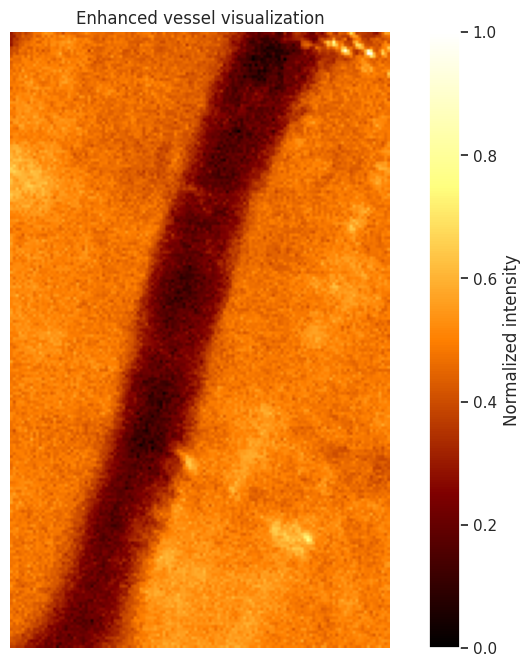

In [9]:
# Function to enhance vessel visibility
def enhance_vessel_contrast(image):
    # Normalize to 0-1
    normalized = (image - np.min(image)) / (np.max(image) - np.min(image))
    # Apply histogram equalization or contrast adjustment
    return np.power(normalized, 0.7)  # Gamma correction

# Enhanced visualization of the first frame
enhanced_frame = enhance_vessel_contrast(sample_frames[0])

plt.figure(figsize=(10, 8))
plt.imshow(enhanced_frame, cmap='afmhot')
plt.colorbar(label='Normalized intensity')
plt.title('Enhanced vessel visualization')
plt.axis('off')
plt.show()

## Time Series Analysis of Vessel Pulsatility

To analyze vessel pulsatility, we can examine how the intensity profile along a line crossing the vessel changes over time. First, let's identify a good location to measure the vessel.

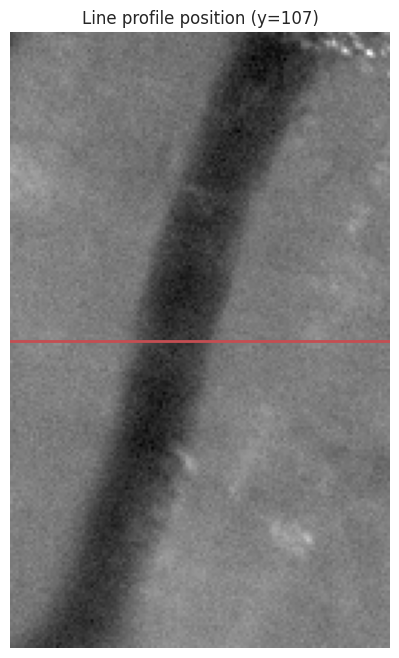

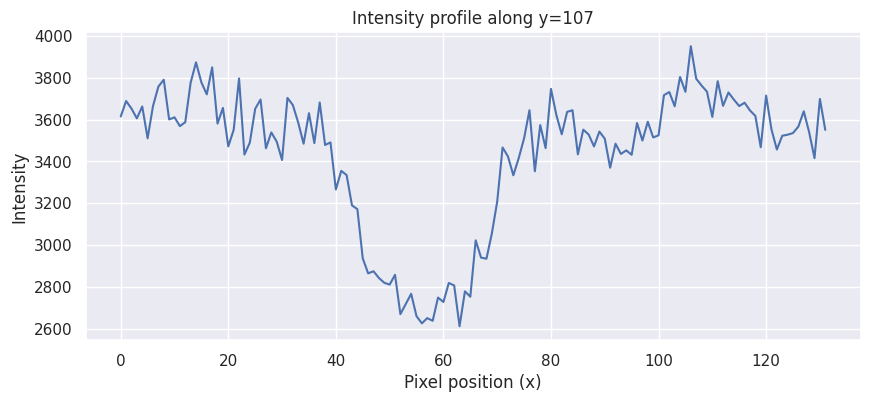

In [10]:
# Display an enhanced frame with a line crossing the vessel
enhanced = enhance_vessel_contrast(sample_frames[0])
plt.figure(figsize=(10, 8))
plt.imshow(enhanced, cmap='gray')

# Choose a line that crosses the vessel
# Based on visual inspection of the enhanced frame
y_position = 107  # Row to analyze (should cross the vessel)
plt.axhline(y=y_position, color='r', linestyle='-', linewidth=2)
plt.title(f'Line profile position (y={y_position})')
plt.axis('off')
plt.show()

# Extract the intensity profile along this line
intensity_profile = sample_frames[0, y_position, :]

plt.figure(figsize=(10, 4))
plt.plot(intensity_profile)
plt.xlabel('Pixel position (x)')
plt.ylabel('Intensity')
plt.title(f'Intensity profile along y={y_position}')
plt.grid(True)
plt.show()

Now let's analyze how this intensity profile changes over time, which will allow us to observe vessel pulsatility:

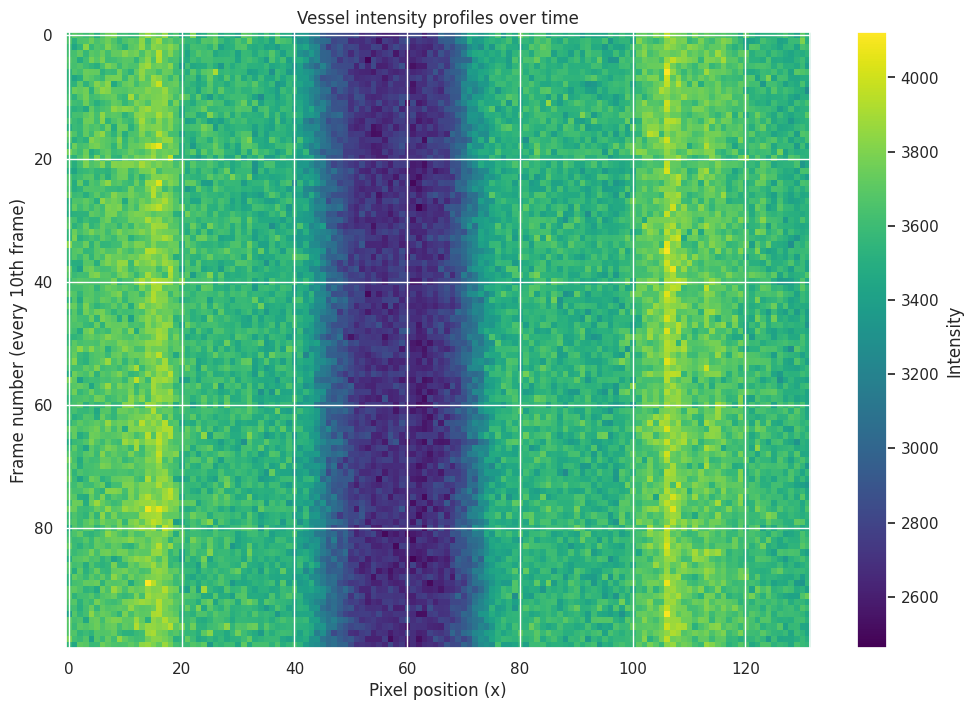

In [11]:
# Load 100 frames to analyze temporal changes
# We'll sample every 10th frame to cover a longer time period
num_frames_to_analyze = 100
sample_interval = 10
frames_to_analyze = np.arange(0, num_frames_to_analyze * sample_interval, sample_interval)

# Extract intensity profiles across all selected frames
intensity_profiles = np.zeros((len(frames_to_analyze), movies.data.shape[2]))

for i, frame_idx in enumerate(frames_to_analyze):
    if frame_idx < movies.data.shape[0]:  # Make sure we don't exceed the number of frames
        intensity_profiles[i, :] = movies.data[frame_idx, y_position, :]

# Create a heatmap of intensity profiles over time
plt.figure(figsize=(12, 8))
plt.imshow(intensity_profiles, aspect='auto', interpolation='none', cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('Pixel position (x)')
plt.ylabel(f'Frame number (every {sample_interval}th frame)')
plt.title('Vessel intensity profiles over time')
plt.show()

## Vessel Diameter Estimation

Let's apply a simple method to estimate the vessel diameter using the Full Width at Half Maximum (FWHM) approach. This is one of the comparison approaches mentioned in the Dandiset title.

In [12]:
# Function to estimate vessel diameter using FWHM
def estimate_vessel_diameter_fwhm(profile):
    # Invert the profile (vessels appear darker than background)
    inverted_profile = np.max(profile) - profile
    
    # Smooth the profile to reduce noise
    smoothed = ndimage.gaussian_filter1d(inverted_profile, sigma=1.0)
    
    # Find the maximum value and its position
    max_val = np.max(smoothed)
    max_pos = np.argmax(smoothed)
    
    # Calculate half maximum
    half_max = max_val / 2
    
    # Find indices where profile crosses half-maximum
    above_half_max = smoothed > half_max
    
    # Find the edges of the vessel
    left_indices = np.where(above_half_max[:max_pos])[0]
    right_indices = np.where(above_half_max[max_pos:])[0] + max_pos
    
    if len(left_indices) == 0 or len(right_indices) == 0:
        return None, None, None, None
    
    left_edge = left_indices[-1] if len(left_indices) > 0 else 0
    right_edge = right_indices[0] if len(right_indices) > 0 else len(profile)-1
    
    # Calculate diameter
    diameter = right_edge - left_edge
    
    return diameter, left_edge, right_edge, smoothed

Let's apply this method to the first few frames to see how it works:

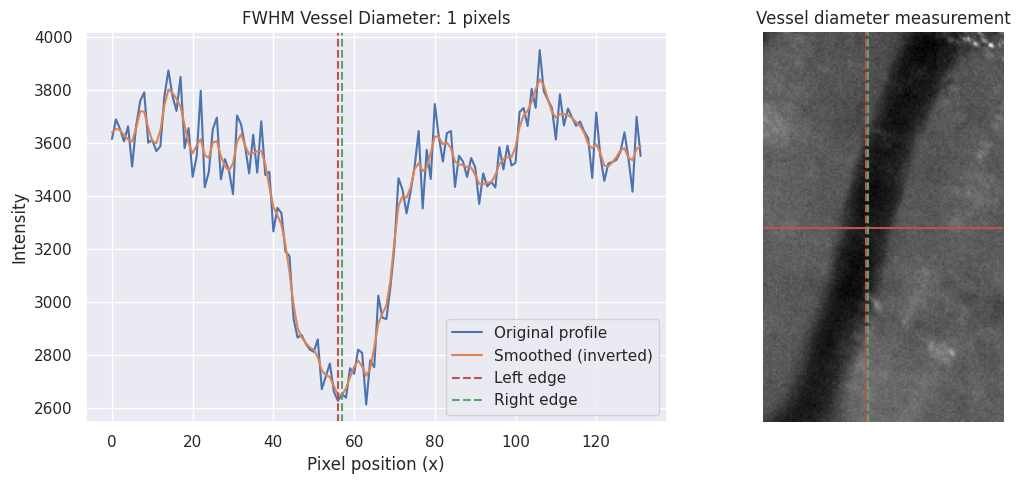

In [13]:
# Analyze the first frame
diameter, left_edge, right_edge, smoothed = estimate_vessel_diameter_fwhm(intensity_profiles[0])

# Plot the results
plt.figure(figsize=(12, 5))

# Original and smoothed profile
plt.subplot(1, 2, 1)
plt.plot(intensity_profiles[0], label='Original profile')
plt.plot(np.max(intensity_profiles[0]) - smoothed, label='Smoothed (inverted)')
plt.axvline(x=left_edge, color='r', linestyle='--', label='Left edge')
plt.axvline(x=right_edge, color='g', linestyle='--', label='Right edge')
plt.xlabel('Pixel position (x)')
plt.ylabel('Intensity')
plt.legend()
plt.title(f'FWHM Vessel Diameter: {diameter} pixels')

# Show the line on the image
plt.subplot(1, 2, 2)
plt.imshow(movies.data[frames_to_analyze[0], :, :], cmap='gray')
plt.axhline(y=y_position, color='r', linestyle='-')
plt.axvline(x=left_edge, color='r', linestyle='--')
plt.axvline(x=right_edge, color='g', linestyle='--')
plt.title('Vessel diameter measurement')
plt.axis('off')

plt.tight_layout()
plt.show()

Now, let's track how the vessel diameter changes over time, which will show us pulsatility:

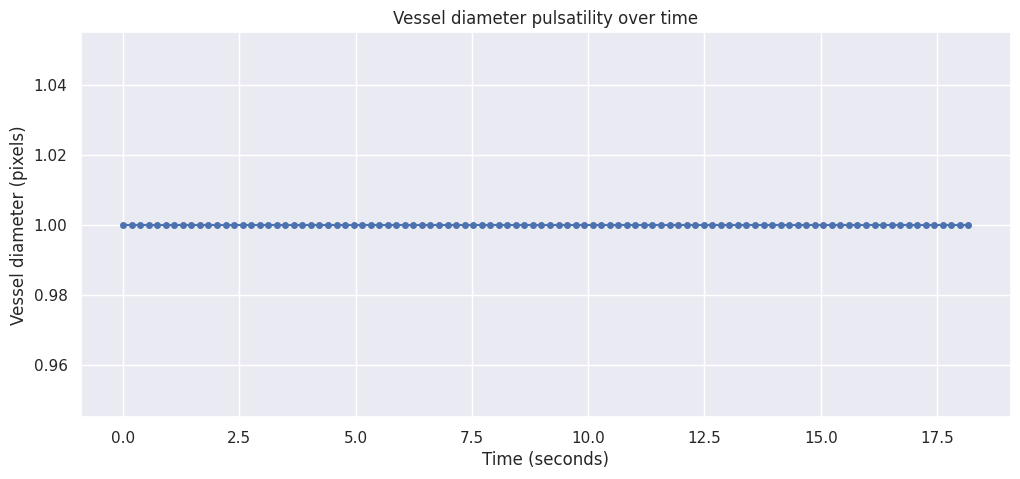

In [14]:
# Extract diameters from multiple frames
diameters = []
timestamps = []

for i, frame_idx in enumerate(frames_to_analyze):
    diameter, _, _, _ = estimate_vessel_diameter_fwhm(intensity_profiles[i])
    if diameter is not None:
        diameters.append(diameter)
        # Calculate real timestamp in seconds
        timestamps.append(frame_idx / movies.rate)

# Plot diameter over time
plt.figure(figsize=(12, 5))
plt.plot(timestamps, diameters, marker='o', linestyle='-', markersize=4)
plt.xlabel('Time (seconds)')
plt.ylabel('Vessel diameter (pixels)')
plt.title('Vessel diameter pulsatility over time')
plt.grid(True)
plt.show()

## Alternative Method: Radon Transform for Vessel Analysis

The Dandiset title mentions comparing approaches for vessel diameter quantification. Let's implement another method using the Radon transform, which can be useful for detecting line-like structures at different angles.

In [15]:
# Load a longer sequence of frames for analysis (every 30th frame, up to 20 frames)
num_longer_frames = 20
longer_interval = 30
longer_frames = np.array([movies.data[i, :, :] for i in range(0, min(num_longer_frames * longer_interval, movies.data.shape[0]), longer_interval)])

print(f"Loaded {longer_frames.shape[0]} frames for Radon transform analysis")

Loaded 20 frames for Radon transform analysis


Now let's define functions to use the Radon transform for vessel analysis:

In [16]:
# Function to enhance vessel visibility in preparation for Radon transform
def preprocess_for_radon(image, sigma=1.0):
    # Normalize
    normalized = (image - np.min(image)) / (np.max(image) - np.min(image))
    
    # Apply Gaussian filter to reduce noise
    smoothed = ndimage.gaussian_filter(normalized, sigma=sigma)
    
    # Enhance contrast
    enhanced = np.power(smoothed, 0.7)
    
    return enhanced

# Function to apply Radon transform at multiple angles
def apply_radon_transform(image, theta=None):
    if theta is None:
        theta = np.linspace(0, 180, 180)
    
    # Apply Radon transform
    sinogram = ndimage.radon(image, theta=theta, circle=False)
    
    return sinogram, theta

Let's apply the Radon transform to an example frame:

In [17]:
# Preprocess and apply Radon transform to the first frame
preprocessed = preprocess_for_radon(longer_frames[0])
theta = np.linspace(0, 179, 180)
sinogram, theta = apply_radon_transform(preprocessed, theta)

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Display the preprocessed image
ax1.imshow(preprocessed, cmap='gray')
ax1.set_title('Preprocessed Image')
ax1.axis('off')

# Display the Radon transform
ax2.imshow(sinogram, cmap='viridis', aspect='auto', 
          extent=[0, 180, 0, sinogram.shape[0]])
ax2.set_title('Radon Transform (Sinogram)')
ax2.set_xlabel('Angle (degrees)')
ax2.set_ylabel('Distance')

plt.tight_layout()
plt.show()

AttributeError: module 'scipy.ndimage' has no attribute 'radon'

The sinogram shows the vessel at different angles. We can find the angle where the vessel is most perpendicular to the transform direction:

In [18]:
# Find the angle where the vessel is most prominent
sinogram_variance = np.var(sinogram, axis=0)
best_angle_idx = np.argmax(sinogram_variance)
best_angle = theta[best_angle_idx]

# Plot the variance across angles
plt.figure(figsize=(10, 4))
plt.plot(theta, sinogram_variance)
plt.axvline(x=best_angle, color='r', linestyle='--', 
            label=f'Best angle: {best_angle:.1f}°')
plt.xlabel('Angle (degrees)')
plt.ylabel('Variance')
plt.title('Sinogram Variance (Higher values indicate stronger directional structures)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'sinogram' is not defined

Now let's extract the vessel profile from the optimal angle:

In [19]:
# Extract the profile at the best angle
vessel_profile = sinogram[:, best_angle_idx]

# Plot this profile
plt.figure(figsize=(10, 4))
plt.plot(vessel_profile)
plt.xlabel('Distance (pixels)')
plt.ylabel('Radon transform value')
plt.title(f'Vessel Profile at {best_angle:.1f}°')
plt.grid(True)
plt.show()

NameError: name 'sinogram' is not defined

## Comparing Multiple Frames with the Radon Transform Method

Let's compare how the vessel appears across different frames using the Radon transform:

In [20]:
# Process multiple frames with Radon transform
radon_profiles = []
frame_indices = []

# Process a subset of frames
for i in range(min(5, longer_frames.shape[0])):
    preprocessed = preprocess_for_radon(longer_frames[i])
    sinogram, _ = apply_radon_transform(preprocessed, theta)
    
    # Extract profile at the best angle
    profile = sinogram[:, best_angle_idx]
    radon_profiles.append(profile)
    frame_indices.append(i * longer_interval)

# Plot the profiles
plt.figure(figsize=(12, 6))
for i, profile in enumerate(radon_profiles):
    plt.plot(profile, label=f'Frame {frame_indices[i]}')
plt.xlabel('Distance (pixels)')
plt.ylabel('Radon transform value')
plt.title(f'Vessel Profiles at {best_angle:.1f}° Across Multiple Frames')
plt.legend()
plt.grid(True)
plt.show()

AttributeError: module 'scipy.ndimage' has no attribute 'radon'

## Advanced Visualization: Spatio-Temporal Vessel Pattern

Let's create a more advanced visualization that shows how the vessel intensity changes both spatially and temporally:

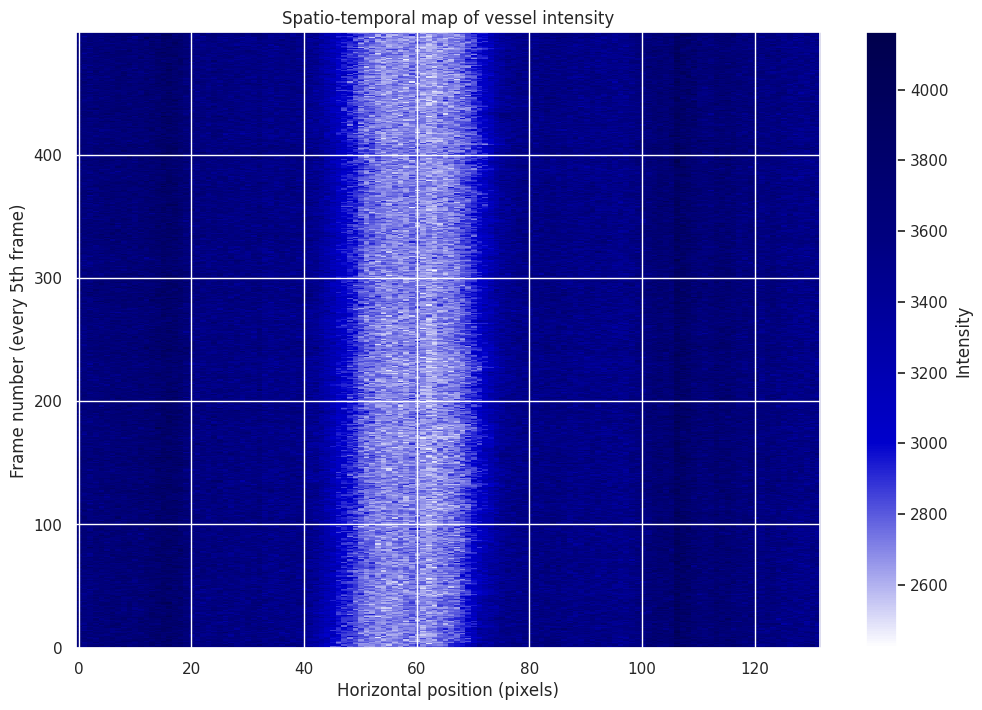

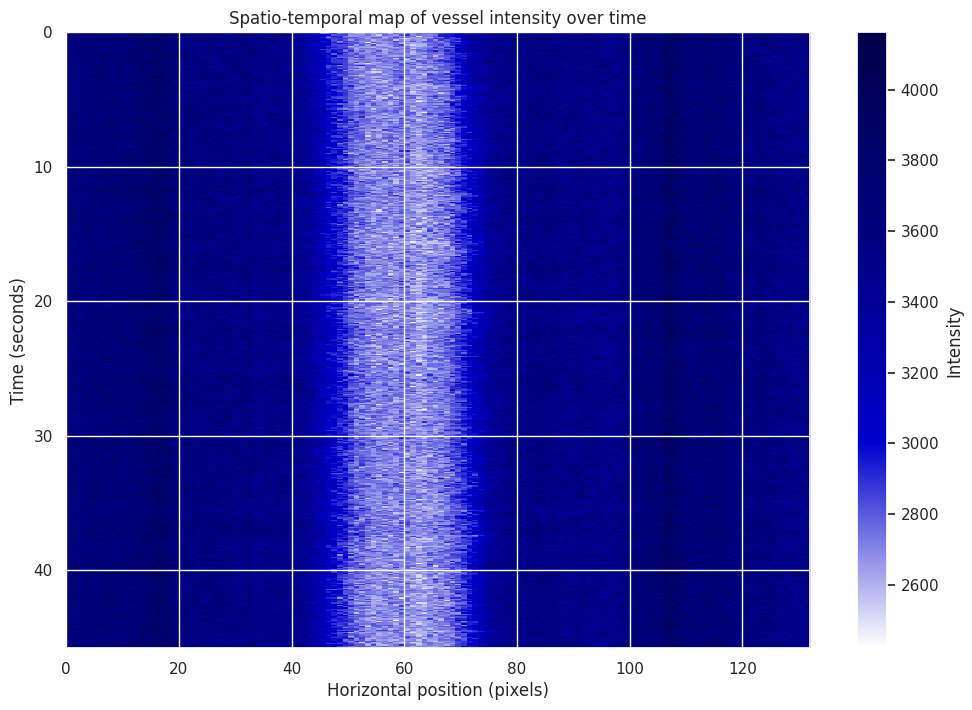

In [21]:
# Create a spatio-temporal map of the vessel
# We'll use the first 500 frames, sampling every 5th frame
num_frames_for_map = 500
map_interval = 5
frames_for_map = range(0, min(num_frames_for_map * map_interval, movies.data.shape[0]), map_interval)

# Extract intensity along the chosen line for each frame
spatiotemporal_map = np.zeros((len(frames_for_map), movies.data.shape[2]))

for i, frame_idx in enumerate(frames_for_map):
    spatiotemporal_map[i, :] = movies.data[frame_idx, y_position, :]

# Create a custom colormap for better visualization
colors = [(1, 1, 1), (0, 0, 0.8), (0, 0, 0.5), (0, 0, 0.3)]  # White to dark blue
cmap_name = 'vessel_cmap'
vessel_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# Visualize the spatio-temporal map
plt.figure(figsize=(12, 8))
plt.imshow(spatiotemporal_map, aspect='auto', cmap=vessel_cmap, 
           interpolation='none', origin='lower')
plt.colorbar(label='Intensity')
plt.xlabel('Horizontal position (pixels)')
plt.ylabel(f'Frame number (every {map_interval}th frame)')
plt.title('Spatio-temporal map of vessel intensity')
plt.show()

# Convert frame numbers to time
time_seconds = np.array(list(frames_for_map)) / movies.rate

# Plot with time on y-axis
plt.figure(figsize=(12, 8))
plt.imshow(spatiotemporal_map, aspect='auto', cmap=vessel_cmap, 
           interpolation='none', extent=[0, movies.data.shape[2], 
                                         time_seconds[-1], time_seconds[0]])
plt.colorbar(label='Intensity')
plt.xlabel('Horizontal position (pixels)')
plt.ylabel('Time (seconds)')
plt.title('Spatio-temporal map of vessel intensity over time')
plt.show()

## Frequency Analysis of Vessel Pulsatility

One important aspect of vessel pulsatility is its frequency characteristics, which relate to heart rate and blood flow dynamics. Let's analyze the frequency content of the vessel diameter fluctuations:

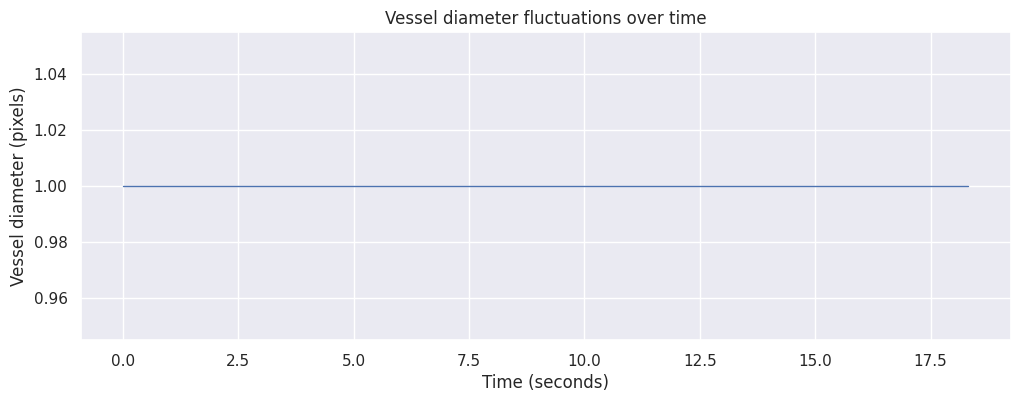

In [22]:
# Extract a longer time series of vessel diameters for frequency analysis
# We'll use every 2nd frame for a finer temporal resolution
freq_interval = 2
num_frames_freq = 500  # Use 500 frames for frequency analysis

frames_for_freq = range(0, min(num_frames_freq * freq_interval, movies.data.shape[0]), freq_interval)
diameters_freq = []
timestamps_freq = []

# Extract a time series of vessel diameter estimates
for frame_idx in frames_for_freq:
    profile = movies.data[frame_idx, y_position, :]
    diameter, _, _, _ = estimate_vessel_diameter_fwhm(profile)
    
    if diameter is not None:
        diameters_freq.append(diameter)
        # Calculate real timestamp in seconds
        timestamps_freq.append(frame_idx / movies.rate)

# Convert to numpy arrays for processing
diameters_array = np.array(diameters_freq)
timestamps_array = np.array(timestamps_freq)

# Remove NaN values if any
valid_indices = ~np.isnan(diameters_array)
diameters_clean = diameters_array[valid_indices]
timestamps_clean = timestamps_array[valid_indices]

# Plot the time series
plt.figure(figsize=(12, 4))
plt.plot(timestamps_clean, diameters_clean, '-', linewidth=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Vessel diameter (pixels)')
plt.title('Vessel diameter fluctuations over time')
plt.grid(True)
plt.show()

Now let's perform frequency analysis using the Fast Fourier Transform (FFT):

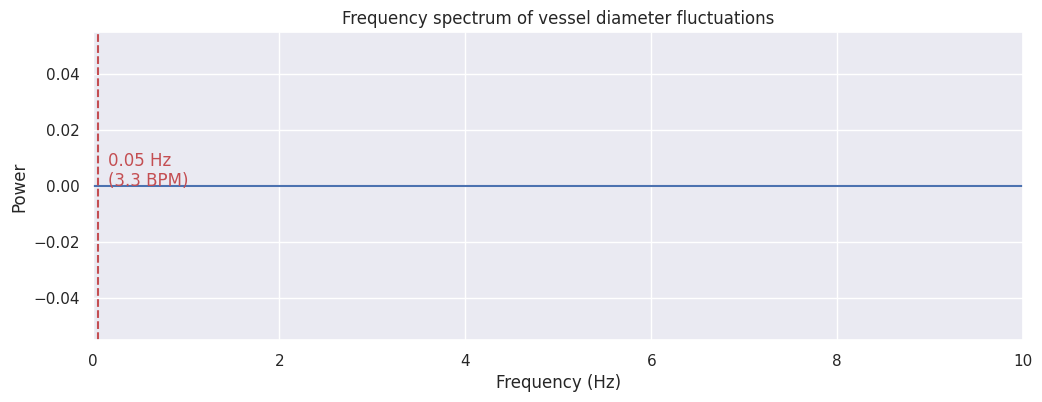

Dominant frequency: 0.05 Hz (3.3 BPM)


In [23]:
# Perform FFT on the diameter time series
# First, we need a regularly sampled time series
if len(timestamps_clean) > 1:
    # Calculate the average sampling rate
    sampling_rate = 1 / np.mean(np.diff(timestamps_clean))
    
    # Perform FFT
    diameters_detrended = diameters_clean - np.mean(diameters_clean)
    fft_result = np.fft.rfft(diameters_detrended)
    fft_freq = np.fft.rfftfreq(len(diameters_detrended), d=1/sampling_rate)
    
    # Calculate power
    fft_power = np.abs(fft_result)**2
    
    # Plot frequency spectrum
    plt.figure(figsize=(12, 4))
    plt.plot(fft_freq, fft_power)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Frequency spectrum of vessel diameter fluctuations')
    plt.xlim(0, 10)  # Limit to physiologically relevant frequencies
    plt.grid(True)
    
    # Find dominant frequency
    max_idx = np.argmax(fft_power[1:]) + 1  # Skip DC component
    dominant_freq = fft_freq[max_idx]
    
    # Mark dominant frequency
    plt.axvline(x=dominant_freq, color='r', linestyle='--')
    plt.text(dominant_freq + 0.1, np.max(fft_power) * 0.9, 
             f'{dominant_freq:.2f} Hz\n({dominant_freq * 60:.1f} BPM)',
             color='r')
    
    plt.show()
    
    print(f"Dominant frequency: {dominant_freq:.2f} Hz ({dominant_freq * 60:.1f} BPM)")
else:
    print("Not enough data points for frequency analysis")

## Summary

In this notebook, we explored Dandiset 001366, which contains imaging data for vessel diameter and pulsatility measurements in mice. We:

1. Loaded and examined NWB files containing vessel imaging data
2. Visualized the vessel structure from the imaging data
3. Performed vessel diameter measurement using the Full Width at Half Maximum (FWHM) method
4. Explored the Radon transform as an alternative approach for vessel analysis
5. Created spatio-temporal maps to visualize vessel pulsatility patterns
6. Conducted frequency analysis to identify pulsation rates

This exploration demonstrates how researchers can access, visualize, and analyze vessel imaging data from the DANDI archive using Python. The techniques shown here can be adapted and extended for more detailed analyses of vessel dynamics and pulsatility.

## Future Directions

Further analyses that could be performed with this dataset include:

1. Implementing and comparing more advanced vessel detection algorithms
2. Correlating vessel diameter changes with physiological measurements
3. Analyzing regional differences in vessel properties
4. Comparing results between multiple subjects
5. Developing automated pipelines for batch processing of vessel imaging data

Researchers interested in vessel diameter and pulsatility quantification can use this dataset to evaluate different methodologies and develop new approaches for analyzing cerebrovascular dynamics.